In [13]:
from ipynb.fs.full.interpolation_functions import *
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator

In [14]:
cat = intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")

## native grid

In [15]:
data = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.native']['daily'].to_dask()

In [16]:
grid = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.native']['node_grid'].to_dask()
model_lon = grid.grid_center_lon.values
model_lat = grid.grid_center_lat.values
# put coordinates to -180 180 format
model_lon = np.where(model_lon>180, model_lon-360, model_lon)

In [23]:
ntimesteps = 30
startday = 0
a_ice = data.a_ice
u_ice = data.uice
v_ice = data.vice

In [24]:
%%time
# interpolate data from unstructured grid to regular grid
# in north polar stereographic projection
do_everything(a_ice, u_ice, v_ice, model_lon, model_lat,
              ntimesteps, startday, 'data/ice_fesom_1950.nc'
             )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


KeyboardInterrupt: 

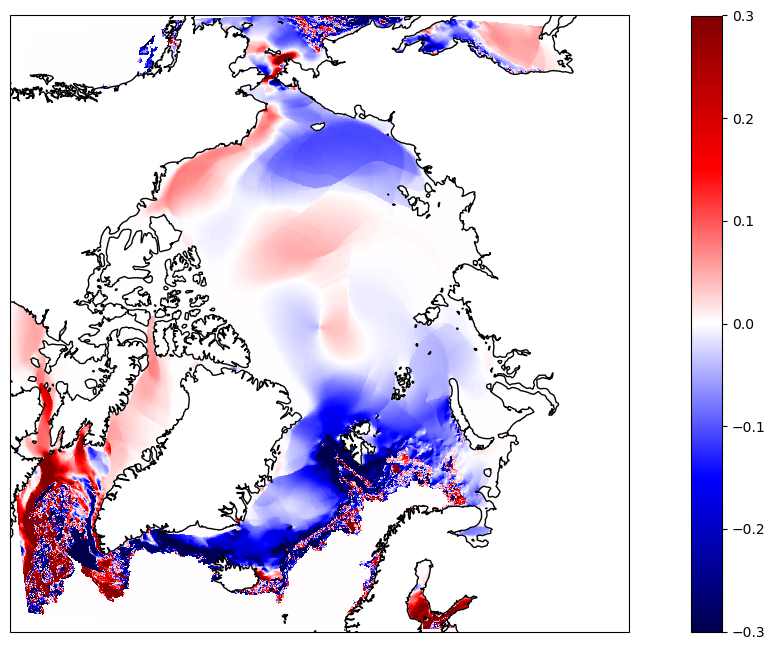

In [11]:
# plot the interpolated data
test = xr.open_dataset('data/ice_fesom_1950.nc')

fig = plt.figure(figsize=[16, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines(zorder=3)
im = ax.pcolormesh(test.ULON, test.ULAT,
                   test.U.isel(time=30),
                   cmap = 'seismic',
                   vmin=-0.3, vmax=0.3,
                   transform=ccrs.PlateCarree())
plt.colorbar(im)

## regular grid

In [42]:
data_atm = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.atmos.gr025']['2d_daily'].to_dask()

In [ ]:
fig = plt.figure(figsize=[16, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines(zorder=3)
im = ax.pcolormesh(data_atm.lon, data_atm.lat,
                   data_atm.nsss[0,:,:],
                   cmap = 'seismic',
                   vmin=-5e5, vmax=5e5,
                   transform=ccrs.PlateCarree())
plt.colorbar(im)

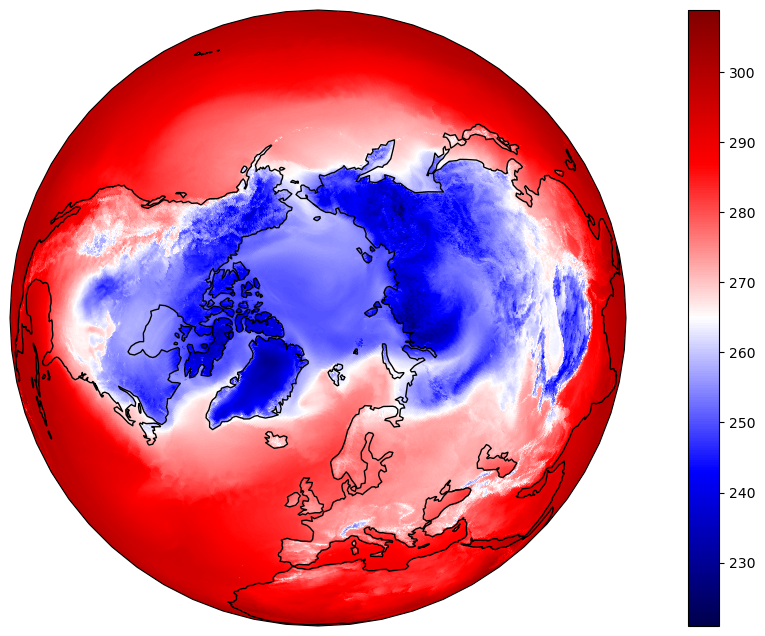

In [74]:
fig = plt.figure(figsize=[16, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines(zorder=3)
im = ax.pcolormesh(data_atm.lon, data_atm.lat,
                   data_atm['2t'][0,0,:,:],
                   cmap = 'seismic',
                   #vmin=-0.3, vmax=0.3,
                   transform=ccrs.PlateCarree())
plt.colorbar(im)

In [ ]:
data_atmo.ewss